In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Hooverova přehrada

V této úloze se podíváme na vývoj výšky hladiny v americké [Hooverově přehradě](https://sk.wikipedia.org/wiki/Hoover_Dam) a prozkoumáme i změnu tlaků, která tuto změnu hladiny doprovází.

Vypočítáme průměrnou výšku hladiny, najdeme maximální a minimální výšku hladiny a spočítáme i hydrostatický tlak! 

In [39]:
data = pd.read_csv("hoover_data.txt", comment = "#", sep = "\t")

# Zdroj dat: https://waterdata.usgs.gov/monitoring-location/09421500/#parameterCode=00065&period=P365D&showMedian=false

Popis načtených dat (která jsou pro nás důležitá):
- datetime - datum a čas měření hladiny,
- 103727_00065 $h$ - nešikovně pojmenovaná veličina (přejmenujeme ji!) popisující výšku hladiny měřenou od určitého bodu hráze - POZOR výška je uvedena ve stopách!

In [40]:
#Přejmenování sloupce

data = data.rename(columns={"103727_00065": "vyska"})

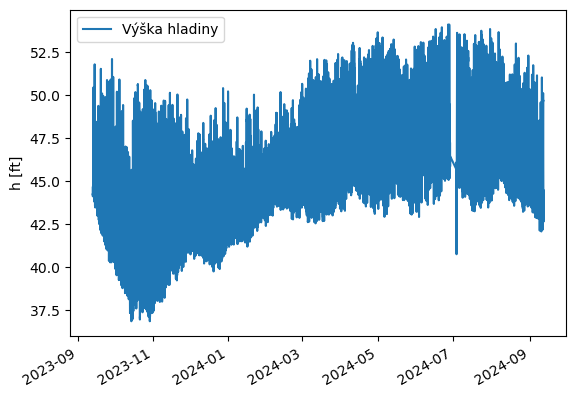

In [41]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["datetime"]
values = data["vyska"]

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslení grafu
plt.plot(dates, values, label = "Výška hladiny")

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

plt.ylabel("h [ft]")
plt.legend()
plt.show()

Stopy nejsou [jednotky SI](https://sk.wikipedia.org/wiki/SI), ale jsou to jednotky Imperiálního [systému jednotek](https://sk.wikipedia.org/wiki/Britsko-americk%C3%A1_s%C3%BAstava_jednotiek). Aby nedošlo k nedorozumění, tak si výšku hladiny převedeme na metry. Jedna stopa je přesně 0,3048 m, takže stačí sloupec přenásobit tímto číslem. 

In [42]:
data["vyska"] = 0.3048*data["vyska"]

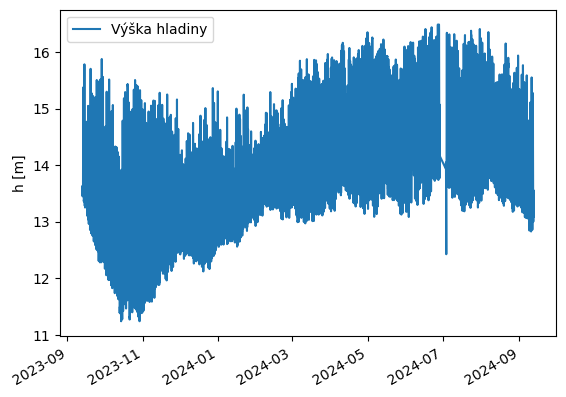

In [43]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["datetime"]
values = data["vyska"]

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslení grafu
plt.plot(dates, values, label = "Výška hladiny")

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

plt.ylabel("h [m]")
plt.legend()
plt.show()

Průměrnou výšku hladiny spočítáme podle vzorce

\begin{equation*}
    \bar{h} = \frac{\sum_i^N h_i}{N},
\end{equation*}

kde $N$ je počet měření a $h_i$ je aktuální výška hladiny

In [44]:
suma_h = 0

for i in range(len(data)):
    suma_h += data.loc[i, "vyska"]

prum_h = suma_h/len(data)

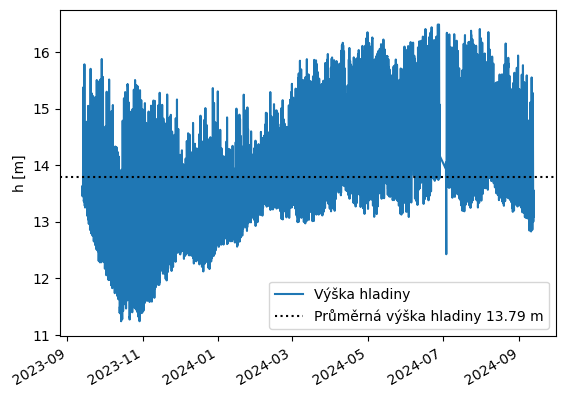

In [45]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["datetime"]
values = data["vyska"]

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslení grafu
plt.plot(dates, values, label = "Výška hladiny")

# Vykreslení průměrné hodnoty
plt.axhline(prum_h, color = "black", label = f"Průměrná výška hladiny {prum_h:,.2f} m", linestyle = ":")

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

# plt.xlabel("Doba měření")
plt.ylabel("h [m]")
plt.legend()
plt.show()

Teď si pomocí jendoduchého kódu najdeme minimální a maximální výšku hladiny

In [46]:
max = data.loc[0, "vyska"]
min = data.loc[0, "vyska"]

for i in range(len(data)):
    if data.loc[i, "vyska"] > max:
        max = data.loc[i, "vyska"]
        max_i = i
    if data.loc[i, "vyska"] < min:
        min = data.loc[i, "vyska"]
        min_i = i

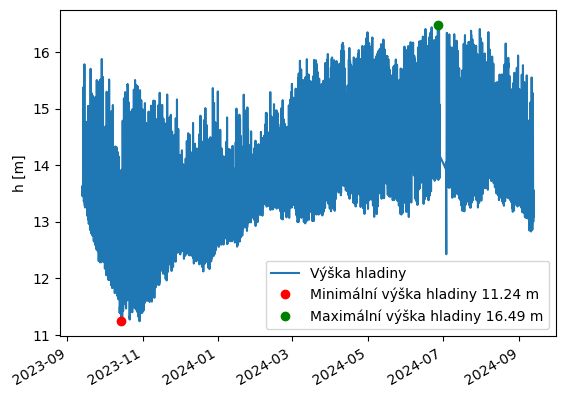

In [47]:
# Graf výšky hladiny v Hooverově přehradě 

# Načtení dat
dates = data["datetime"]
values = data["vyska"]

# Převedení datumu z textové podoby do datetime objektu 
dates = [datetime.strptime(date, "%Y-%m-%d %H:%M") for date in dates]

# Vykreslení grafu
plt.plot(dates, values, label = "Výška hladiny")

#vykreslení extrémů
plt.plot(dates[min_i], min, "o", color = "red", label = f"Minimální výška hladiny {min:,.2f} m")
plt.plot(dates[max_i], max, "o", color = "green", label = f"Maximální výška hladiny {max:,.2f} m")

# Naformátování x-ové osy (datumů), aby se data nepřekrývala 
plt.gcf().autofmt_xdate() 

# plt.xlabel("Doba měření")
plt.ylabel("h [m]")
plt.legend()
plt.show()

Představme si, že umístíme senzor pro meření tlaku na břeh nádrže v době kdy je hladina přehrady minimální (senzor umístíme do výšky 11,24 m). Jaký tlak senzor naměří když výška hladiny bude maximální tj. 16,49 m. Výška vodní hladiny nad senzorem je $\Delta h = h_{max} - h_{min}$. Tlak vody působící na senzor dopočítáme pomocí Archymédova zákona náledovně

\begin{equation*}
    p_h = \Delta h \rho g,
\end{equation*}

kde $\rho \approx 1000$ $\text{kg/m}^3$ je předpokládaná hustota vody a $g \approx 9.81$ $\text{m/s}^2$ je tíhové zrychlení. Taky nesmíme zapomenout tlak vzduchu ($p_a = 101325$ $Pa$) který působí na vodní hladinu tím pádem jej naměří i senzor umístený pod hladinou.

\begin{equation*}
    p = p_h + p_a
\end{equation*}

In [48]:
rho = 1000
g = 9.81

In [50]:
p = (max-min)*rho*g

print(f"Tlak naměřený senzorem pod vodní hladinou bude p = {p + 101325:,.2f} Pa. \n Rozdíl tlaků způsoben hydrostatickým tlakem je {p:,.2f} Pa.")

Tlak naměřený senzorem pod vodní hladinou bude p = 152,814.32 Pa. 
 Rozdíl tlaků způsoben hydrostatickým tlakem je 51,489.32 Pa.
